In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
plt.rcParams["figure.figsize"] = (16,8)

In [135]:
import os
os.listdir("data/EEG")

['EEG_403_IREZIT.mat',
 'EEG_17_GIAAND.mat',
 'EEG_310_FEDSPO.mat',
 'EEG_99_CLABAT_2.mat',
 'EEG_129_LORGIU_3.mat',
 'EEG_996_LORGIU_3.mat',
 '.DS_Store',
 'EEG_506_LORGIU_2.mat',
 'EEG_196_MELCAD.mat',
 'EEG_69_NARNIM.mat',
 'EEG_615_LORGIU_7.mat',
 'EEG_47_GIAGIR.mat',
 'EEG_399_NAOROC.mat',
 'EEG_325_GIUROS.mat',
 'EEG_650_CLABAT_4.mat',
 'EEG_324_CARPEL.mat',
 'EEG_133_LORGIU_5.mat',
 'EEG_599_GIADOM.mat',
 'EEG_5_CLABAT.mat',
 'EEG_7_ELEVAL.mat',
 'EEG_196_GIADOM_2.mat',
 'EEG_234_VANLIT.mat',
 'EEG_312_DAMSPO.mat',
 'EEG_361_CLABAT_3.mat',
 'EEG_544_LORGIU_6.mat']

In [158]:
p = "data/EEG/EEG_133_LORGIU_5.mat"

In [159]:
f = h5py.File(p,'r')
data = f.get('y')
data = np.array(data)
data = data[:, 1:-1]
data[:, -1] -= 1 #useful for sign changes

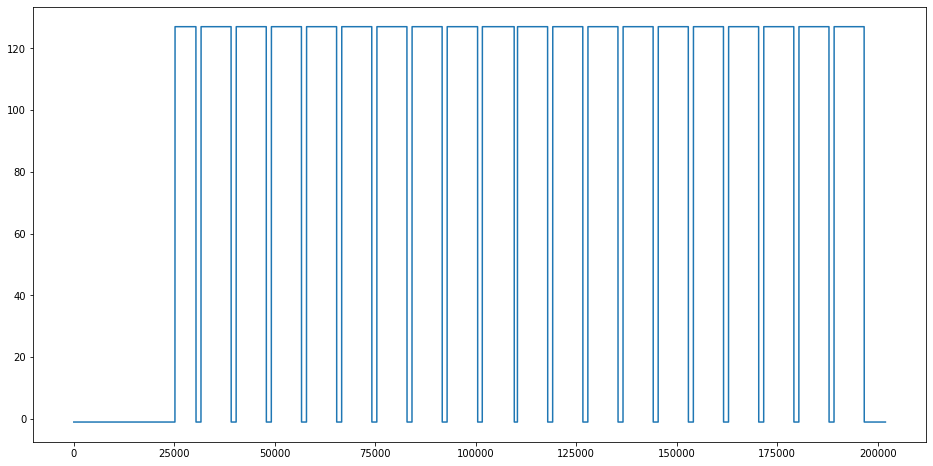

In [160]:
plt.plot(data[:, -1])

In [161]:
t_id = 0
signchange = ((np.roll(data[:, -1], 1) - data[:, -1]) != 0).astype(int)
trig = np.where(signchange == 1)[0]
trig_coupled = np.array([(trig[i], trig[i+1]) for i in range(0, len(trig)-1, 2)])
a = trig_coupled[t_id][0], trig_coupled[t_id][1]

In [162]:
a = 0
idx = 0

In [163]:
for t_id in trig_coupled:
    print(t_id[1] - t_id[0],  t_id[0],  t_id[1])

5218 25170 30388
7491 31647 39138
7491 40397 47888
7491 49147 56638
7490 57897 65387
7491 66647 74138
7491 75397 82888
7500 84147 91647
7585 92882 100467
7939 101632 109571
7509 110379 117888
7496 119146 126642
7487 127900 135387
7492 136650 144142
7496 145396 152892
7491 154150 161641
7491 162900 170391
7491 171650 179141
7491 180400 187891
7491 189150 196641


In [88]:
data_c = data.copy()

In [164]:
data[30388-7500 : 30388, -1 ] = 127

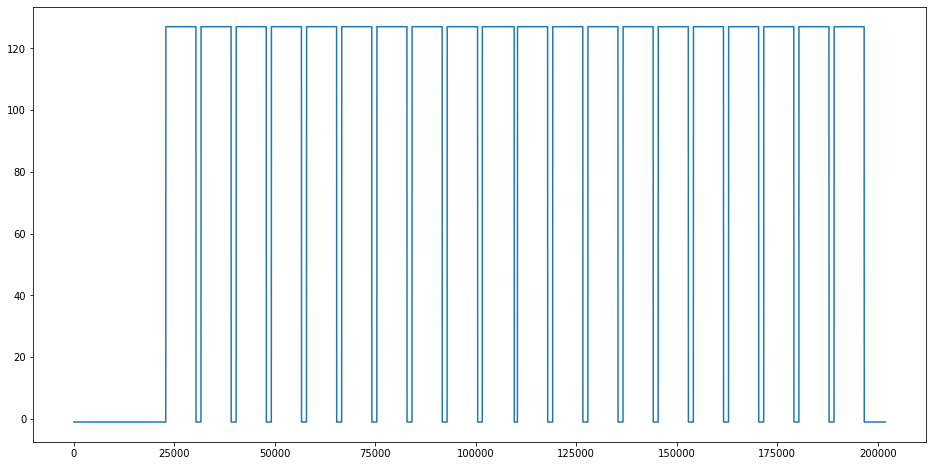

In [165]:
plt.plot(data[:, -1])
#plt.plot(data_c[:, -1])

In [152]:
import scipy.io

In [166]:
scipy.io.savemat('EEG_133_LORGIU_5.mat', {'y': data})